<a href="https://colab.research.google.com/github/pyhtonman0101/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Mohd_Zahid_Ansari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**Mohd Zahid Ansari
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. 

The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored, read, acknowledged by the reader.

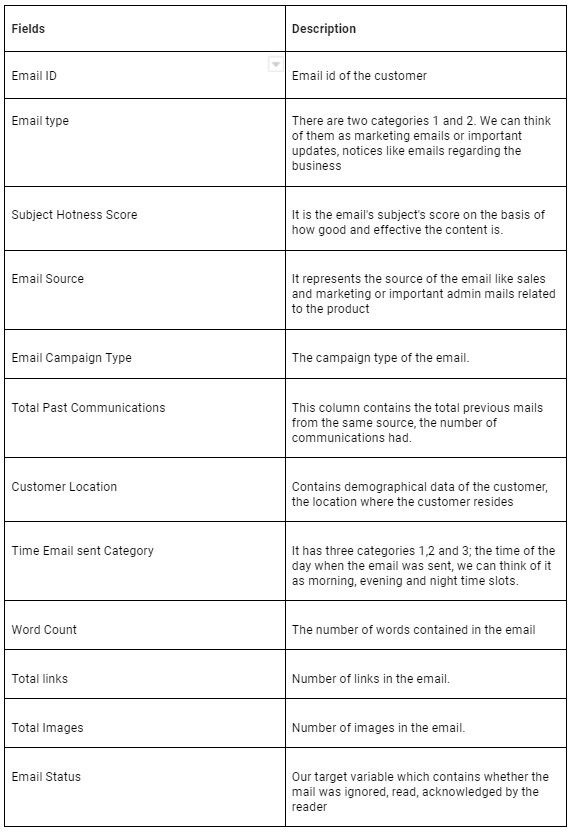

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math
from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score, classification_report
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset  
email_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Email Campaign Effectiveness Prediction - Mohd Zahid Ansari/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
email_df.head()

In [ ]:
email_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
email_df.shape

### Dataset Information

In [ ]:
# Dataset Info
email_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Duplicate values in the email_df dataset: {len(email_df[email_df.duplicated()])}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
email_df.isnull().sum()

In [ ]:
columns = list(email_df.columns)
columns

In [ ]:
# Visualizing the missing values
for feature in columns:
  print(f'Percentage of missing values in {feature} feature: {(email_df[feature].isnull().sum())/email_df.shape[0]*100}%')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
email_df.describe()

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for feature in columns[1:]:
  print(f'Unique values of {feature}:\n', email_df[feature].unique(), '\n')


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Checking Shape of Email Read
print("No. of Email Read : ",len(email_df[email_df['Email_Status'] == 1]))
# Checking Shape of Email Acknowledged by Reader
print("No. of Email Acknowledged : ",len(email_df[email_df['Email_Status'] == 2]))
# Checking Shape of Email Ignored
print("No. of Email Ignored : ",len(email_df[email_df['Email_Status'] == 0]))

In [ ]:
#creating variable to store numerical feature
num_feature = email_df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

In [ ]:
#creating variable to store categorial features
cat_feature = [feature for feature in email_df.columns.to_list() if feature not in num_feature]
cat_feature 

In [ ]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [ ]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for {cat}')
    print(email_df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for {cat}')
    print(email_df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for {cat}')
    print(email_df.groupby(cat).apply(Ignore))
    print('='*120)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Distribution Plot of continuous variable.(Distplot)

In [ ]:
enumerate(num_feature)

In [ ]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (20,30))
for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(email_df[col], color = '#055E85', fit = norm);
    feature = email_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
ds_cat = email_df[cat_feature]
ds_cat

In [ ]:
# categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                        #  'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

fig, axs = plt.subplots(3, 2,figsize=(25, 25))
# j and k is for iterating through axis in subplot
j=0
k=-1
for i in cat_feature[1:-1]:
# Updating j and k for plotting on subplot  
  k+=1
  if k>1:
    k=0
    j+=1

  sns.countplot(data = ds_cat, x=i,hue='Email_Status', ax=axs[j, k],palette='viridis')
  # axs[j,k].set(title = f'Graph between {i} and Sales', xlabel=i)

###Effect of Email Type 
Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 2 Enagement Based on Email Type

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Status'], hue=email_df['Email_Type'], palette='viridis')
unique = len([x for x in email_df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

In [ ]:
#pie chart for distribution of each email type
email_df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['darkblue','darkgreen'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3: Engagement based on Email Type with all numerical features

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(35, 35))
# j and k is for iterating through axis in subplot
j=0
k=-1
for value in num_feature:
# Updating j and k for plotting on subplot  
  k+=1
  if k>1:
    k=0
    j+=1

  ax = sns.barplot(data = email_df, x = 'Email_Status',y = value, hue = 'Email_Type', ax=axs[j, k],palette='viridis')
  unique = len([x for x in email_df['Email_Status'].unique()])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  # plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  # plt.title(value)
  
  # print('='*120)
  axs[j,k].set(title = f'Graph between {value} and Email Status')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4: Effect of Email Campaign Type

In [ ]:
#pie chart for distribution of each email campaign type
email_df['Email_Campaign_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Type 2','Type 3', 'Type 1'],
                              #  colors=['skyblue','red','green'],
                               explode=[0,0,0]
                              );

In [ ]:
#bar plot for understanding how email status is affected by campign type 
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Campaign_Type'], hue=email_df['Email_Status'], palette='viridis')
unique = len([x for x in email_df['Email_Campaign_Type'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5: Location with most Email Acknowledged

In [ ]:
#pie chart for distribution of each email campaign type
email_df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['skyblue','red','green','violet','yellow','brown','cyan','magenta'],
                               explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01]
                              );


In [ ]:
#based on location identifying how email status changed
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Status'], hue=email_df['Customer_Location'], palette='viridis')
plt.show()

In [ ]:
#checking effect of location on other numerical features
fig, axs = plt.subplots(3, 2,figsize=(35, 35))
# j and k is for iterating through axis in subplot
j=0
k=-1
for value in num_feature:
# Updating j and k for plotting on subplot  
  k+=1
  if k>1:
    k=0
    j+=1

  sns.barplot(data = email_df, x = 'Email_Status',y = value, hue = 'Customer_Location', ax=axs[j, k],palette='viridis')
  axs[j,k].set(title = f'Graph between {value} and Email Status')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6: Effect of Time Email was sent

In [ ]:
# Chart - 6 visualization code

In [ ]:
#pie chart for distribution of email based on time period
email_df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['blue','darkgreen','grey'],
                               explode=[0.01,0.01,0.01]
                              );

In [ ]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=email_df['Email_Status'], hue=email_df['Time_Email_sent_Category'], palette='viridis')
unique = len([x for x in email_df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7: continuous variables through boxplots

In [ ]:
#continuous variables through boxplots
fig, axs = plt.subplots(3, 2,figsize=(35, 35))
# j and k is for iterating through axis in subplot
j=0
k=-1
for value in num_feature:
# Updating j and k for plotting on subplot  
  k+=1
  if k>1:
    k=0
    j+=1

  sns.boxplot(x=email_df['Email_Status'], y= email_df[value], ax=axs[j, k],palette='viridis')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**

* In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.


* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

* The median is kind of similar in all of the three cases in total links feature with a number of outliers.

* More images were there in ignored emails.

* There are considerable number of outliers in Subject_Hotness_Score, Total_Links and Total_Images.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8: Distribution of Total Past Communication w.r.t Email Status

In [ ]:
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = email_df, 
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='viridis')

plt.title('Distribution of Total Past Communications with respect to Email Status')
plt.xlabel('Total_Past_Communications')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
email_df

In [ ]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = email_df.drop(columns_to_drop,axis=1)

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged.
Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.


#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# sns.pairplot(df, hue="Email_Status", palette='viridis');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The Email_Type of the campaign will not have any significant impact on the Email_Status.
* The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications.
* The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email.

### Hypothetical Statement - 1 
---
The Email_Type of the campaign will not have any significant impact on the Email_Status


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(email_df['Email_Type'], email_df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used chi-square test of independence which is a statistical test to determine if there is a significant association between two categorical variables. In this case, the two variables are Email_Type and Email_Status. 

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are categorical and I want to determine if there is a relationship between them.

### Hypothetical Statement - 2

---
The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
* Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [ ]:
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


In [ ]:
# perform non-parametric Spearman's rank correlation test
rho, p_value = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used Pearson's correlation test which measures the linear correlation between two continuous variables. In this case, the two variables are Subject_Hotness_Score and Total_Past_Communications.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are continuous and I want to determine if there is a linear relationship between them.

### Hypothetical Statement - 3
---
The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(email_df[email_df['Customer_Location'] == 'A']['Total_Links'], 
                                  email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'D']['Total_Links'], 
                                  email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(email_df[email_df['Customer_Location'] == 'A']['Total_Images'], 
                                  email_df[email_df['Customer_Location'] == 'B']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'C']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'D']['Total_Images'], 
                                  email_df[email_df['Customer_Location'] == 'E']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'F']['Total_Images'],
                                  email_df[email_df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")


In [ ]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(email_df[email_df['Customer_Location'] == 'A']['Total_Links'], 
                              email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'D']['Total_Links'], 
                              email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used ANOVA (Analysis of Variance) test because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Visualizing the missing values
for feature in columns:
  print(f'Percentage of missing values in {feature} feature: {(email_df[feature].isnull().sum())/email_df.shape[0]*100}%')

We have a lot of nulls in the following columns:
* Customer Location
* Total Past Communications
* Total Links
* Total Images


But particularly customer location has a lot of them. Since it is a categorical column and it is difficult to just impute them with our understanding of where the customer's location is, we'll see how much it affects our target variable, whether a particular location has anything to do with it or it is not correlated at all and accordingly we can decide on it later on.
Let's fill up the null values in other columns.

In [ ]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
plt.figure(figsize = (10,7))
sns.distplot(x=email_df['Total_Past_Communications'], hist = True)

We have kind of a normal ditribution for Total Past Communications and it will be fine, if we use mean to fill up the null values of this column.

In [ ]:
#filling up the null values for total past comm
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace = True)

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
plt.figure(figsize = (10,7))
sns.distplot(x=email_df['Total_Links'], hist= True)

It seems like most of the values of the Total Links in the column are between 0-10 and the distribution is skewed on the right. Mode is more robust to outlier effect.

In [ ]:
#filling up the Total Links Column
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0], inplace = True)

In [ ]:
#total image distribution
plt.figure(figsize = (10,7))
sns.distplot(x=email_df['Total_Images'], hist=True)

The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [ ]:
#filling up the Total Images Column
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace = True)

In [ ]:
#check for duplicates
email_df.duplicated().sum()

In [ ]:
#Visualizing Customer_Location
plt.figure(figsize = (10,10))
sns.countplot(email_df['Customer_Location'], palette='viridis')

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.countplot(email_df['Customer_Location'],hue=email_df['Email_Status'], palette='viridis')
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(email_df,'Customer_Location',ax)

As we can see irrespective of location the ratio of <b>Email_Status</b> is same throughout .So <b>we can drop the location column

In [ ]:
#dropping Customer_Location column
email_df.drop('Customer_Location',inplace=True,axis=1)

In [ ]:
#dropping email_id column because it has no use in ML model
email_df.drop('Email_ID',inplace=True,axis=1)

In [ ]:
email_df.columns

In [ ]:
# Varify now there is no missing values in the data
email_df.isnull().sum()

**Multicollinearity and Feature Selection:**

Multicollinearity occurs when two or more independent continuous features in the dataset are highly correlated and can help predict each other and the dependent variable. This makes it difficult to individually analyse the affect of these individual independent variables on the target or dependent variable.

We can quantify multicollinearity using Variance Inflation Factors (VIF).

VIF = 1/(1-R^2) 
The more the value of R^2 is closer to 1 the more, VIF score tends to infinity.
VIF starts with 1 and denotes that the variable has no correlation at all.
VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models.

In [ ]:
#VIF code
def vif_calc(email_df):
  vif = pd.DataFrame()
  vif["variables"] = email_df.columns
  vif["VIF"] = [variance_inflation_factor(email_df.values, i) for i in range(email_df.shape[1])]
  return(vif)

In [ ]:
df1 = email_df[[i for i in email_df.describe().columns if i not in cat_feature + ['Email_Status']]]
df1.isnull().sum()
df1

In [ ]:
#let's get VIF scores
vif_df = vif_calc(email_df[[i for i in email_df.describe().columns if i not in cat_feature + ['Email_Status']]])
vif_df

We can see that only Total Links is higher than 5. Earlier we saw that Total Images and Total Links are highly correlated to each other with a score of 0.75. We can try combining both of these or deleting one of these.

In [ ]:
#scatter plot between images and links, shows a linear relationship
plt.figure(figsize=(15,8))
sns.scatterplot(x=email_df["Total_Images"],y=email_df["Total_Links"],hue=email_df['Email_Status'], palette='viridis') #it shows the collinearity

In [ ]:
#we can try combining them up
email_df['Total_Img_links'] = email_df['Total_Images'] + email_df['Total_Links']
email_df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
#let's check VIF scores
vif_df = vif_calc(email_df[[i for i in email_df.describe().columns if i not in cat_feature + ['Email_Status']]])
vif_df

Now we have our multicollinearity in check!!

### 2. Handling Outliers

In [ ]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
sns.set(font_scale=1.0)
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Total_Img_links']
email_df.boxplot(numerical_col)

In [ ]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.0)
email_df.boxplot('Word_Count')

There are no outliers in Word_Count

In [ ]:
#Let's check the number of outliers in each category of diff numerical features
num_feature.remove('Word_Count')
num_feature.remove('Total_Links')
num_feature.remove('Total_Images')
num_feature.append('Total_Img_links')


In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in num_feature:
  q_75, q_25 = np.percentile(email_df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=email_df.loc[email_df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(email_df.loc[email_df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

We calculated the number of outliers with respect to the individual classes of our target variable. The minority class in our target variable is 1 and 2. But when we get rid of outliers we should check that we aren't deleting more than 5% of useful information related to minority class. Otherwise, the model will not be able to classify our minority classes correctly having lack of information. Let's check the percentage of outliers in minority class.

In [ ]:
email_df['Email_Status'].value_counts()

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0  
majority_outliers = 0
for col in num_feature:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = email_df['Email_Status'].value_counts()[1] + email_df['Email_Status'].value_counts()[2]
total_maj = email_df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

In [ ]:
email_df

In [ ]:
email_df.shape

In [ ]:
df['Email_Status'].value_counts()

In [ ]:
#deleting majority outliers
for elem in num_feature:
  q_low = email_df[elem].quantile(0.01)
  q_hi  = email_df[elem].quantile(0.99)
  email_df = email_df.drop(email_df[(email_df[elem] > q_hi) &  (email_df['Email_Status']==0)].index)
  email_df = email_df.drop(email_df[(email_df[elem] < q_low) & (email_df['Email_Status']==0)].index)

In [ ]:
email_df.shape

In [ ]:
email_df['Email_Status'].value_counts()

We have more than 5% outliers in minority section and hence to avoid lack of information, we decide against deleting them.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Data Scaling

In [ ]:
num_feature

In [ ]:
# apply normalization techniques
num_feature=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Img_links']
for column in num_feature:
    email_df[column] = (email_df[column] - email_df[column].min()) / (email_df[column].max() - email_df[column].min()) 

In [ ]:
email_df.head()

Lets visualize our normalized data

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in num_feature:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_df[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1




#### Now we are done with scaling ,it's time to perform one-hot encoding on our categorical data.

### 4. Categorical Encoding

In [ ]:
email_df.head()

In [ ]:
cat_feature

In [ ]:
cat_feature=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']
email_df=pd.get_dummies(email_df, columns=cat_feature)
email_df.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_df.drop('Email_Source_Type_2',axis=1,inplace=True)

In [ ]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(email_df.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_df=email_df[list_of_col]
email_df.head(2)

## **Feature Importance**

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))


In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

In [ ]:
info_gain={}
for feature in email_df.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_df, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

We can observe that Time_Email_sent_Category_1,Time_Email_sent_Category_2 Time_Email_sent_Category_3 have very less importance we can drop this feature.

In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']
email_df.drop(drop,inplace=True,axis=1)

In [ ]:
email_df.head(1)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### Now we are done with feature selection lets move to data imbalance handling.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 80:16:4. So, during model creating it's obvious that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## Synthetic Minority Oversampling Technique (SMOTE)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

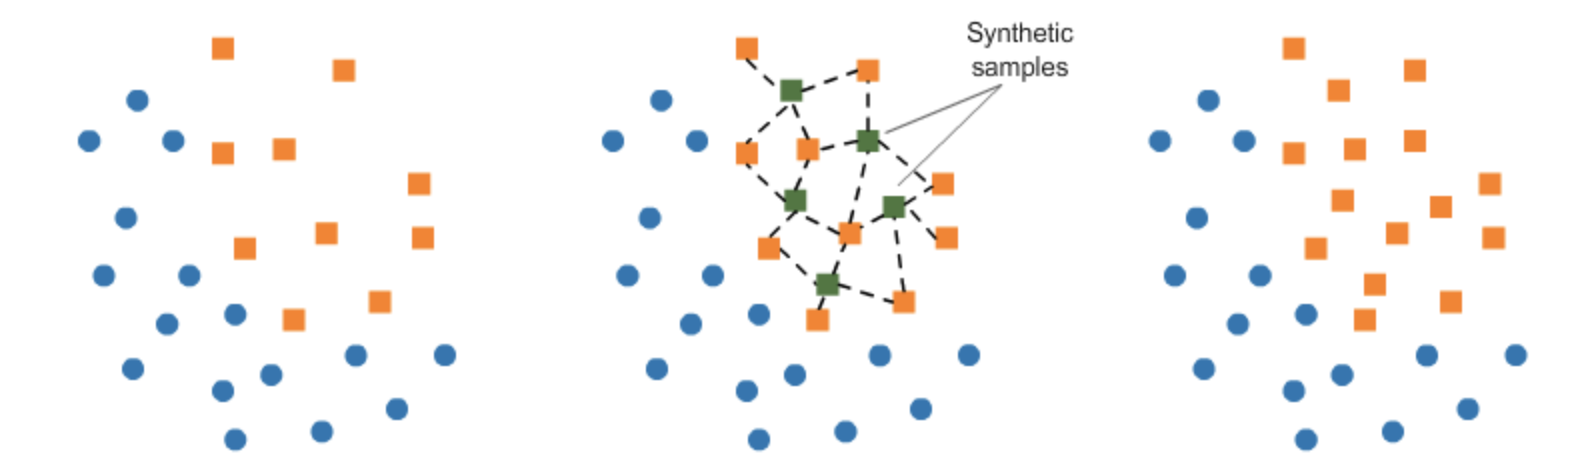

In [ ]:
email_df.head(2)

In [ ]:
email_df.shape

In [ ]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(email_df.iloc[:,0:-1], email_df['Email_Status'])

print('Original dataset shape', len(email_df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
email_df['Email_Status'].value_counts()

In [ ]:
plt.bar(Counter(email_df['Email_Status']).keys(), Counter(email_df['Email_Status']).values())
plt.title("Before SMOTE")

In [ ]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

In [ ]:
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

###Now we have a <b>total balanced data with 53502 records for each class.

### 8. Data Splitting

In [ ]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify=y_smote)

In [ ]:
# Shape of split dataset
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

In [ ]:
print(X_train.columns)
print(y_train)

##### What data splitting ratio have you used and why? 

* Taking a 80-20 train test split.
* We need to use the stratify parameter in order to make sure that the train and test datasets have the same ratios of the predictor variables.

## ***7. ML Model Implementation***

### ML Model - 1: **Decision Tree Model**

In [ ]:
# Initializing the DecisionTreeClassifier
dt_classifier_smote = DecisionTreeClassifier()

In [ ]:
# Fitting onto the train set
dt_classifier_smote.fit(X_train,y_train)

### Evaluation Matrix 

In [ ]:
#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print(classification_report(train_class_preds, y_train))
  
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print(classification_report(test_class_preds, y_test))
  # make_heatmap(test_cm, 'test_data')
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res

In [ ]:
final_list=[]

In [ ]:
# Evaluation of our decision tree model
res=evaluate(dt_classifier_smote,X_train,y_train,X_test,y_test,'Decision_Tree_SMOTE')
final_list.append(res)

###We can observe that model is overfitting since it's performing really well on training set but not that good on unseen data. Lets find what can be the reason by implimenting other algorithm.

## ML Model - 2: **XGBoost**

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [ ]:
# Fit the model
xgb_model.fit(X_train,y_train)

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train,y_train,X_test,y_test,'XGBoost')
final_list.append(res)

###We have Good F1 score for both training and testing data using XGBoost model.

####Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')

xgb_grid1=xgb_grid.fit(X_train,y_train)

In [ ]:
#best parameter
print("Best: %f using %s" % (xgb_grid.best_score_, xgb_grid.best_params_))

In [ ]:
res=evaluate(xgb_grid1,X_train,y_train,X_test,y_test,'Hyper_Tuned_XGBoost')
final_list.append(res)

##ML Model - 3: **Naive Bayes Classifier**

In [ ]:
# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()

## 1) Gaussian

In [ ]:
# Fit the model
gausian.fit(X_train,y_train)

In [ ]:
# Evaluate results
res=evaluate(gausian,X_train,y_train,X_test,y_test,'Gaussian')
final_list.append(res)

##2) Bernoulli

In [ ]:
# Fit model
bernoulli.fit(X_train,y_train)

In [ ]:
# Evaluate model
res=evaluate(bernoulli,X_train,y_train,X_test,y_test,'Bernoulli')
final_list.append(res)

###All the 2 models under naive bayes give results worse than the baseline models. Hence we reject these models.

##ML Model- 4: **KNN Classifier**

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train,y_train)

In [ ]:
# Evaluate the model
res=evaluate(classifier_knn,X_train,y_train,X_test,y_test,'KNN')
final_list.append(res)

####Cross- Validation & Hyperparameter Tuning

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [ ]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

In [ ]:
print("Best score is: ",knn_cv.best_score_)

In [ ]:
print("Best Parameters are: ",knn_cv.best_params_)

In [ ]:
# Evaluate results
res=evaluate(knn_cv,X_train,y_train,X_test,y_test,'Hyper_Tuned_KNN')
final_list.append(res)

##ML Model - 5: **Random Forest**

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train,y_train)

In [ ]:
# Evaluate results
res=evaluate(classifier_rf,X_train,y_train,X_test,y_test,'Random_Forest')
final_list.append(res)

####Cross- Validation & Hyperparameter Tuning

In [ ]:
# Number of trees
n_estimators = [50,100]

# Maximum depth of trees
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
#The best esitmators
rf_random.best_estimator_

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

In [ ]:
# Evaluate results
res=evaluate(rf_optimal_model,X_train,y_train,X_test,y_test,'Hyper_Tuned_Random_Forest')
final_list.append(res)

##ML Model - 6: **Logistic Regression:**


In [ ]:
logreg = LogisticRegression()

# Fit on the train set
logreg.fit(X_train,y_train)

# Evaluate the results
res=evaluate(logreg,X_train,y_train,X_test,y_test,'Logistic_Regression')
final_list.append(res)

In [ ]:
All_model=pd.DataFrame(final_list)

In [ ]:
All_model

In [ ]:
ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["F1_SCORE_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2,labels=('F1_SCORE_Test'))
ax = sns.pointplot(x=All_model["F1_SCORE_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7,labels=('F1_SCORE_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["F1_SCORE_Test","F1_SCORE_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# visulaizing illustration
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["ROC_AUC_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2)
ax = sns.pointplot(x=All_model["ROC_AUC_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7)
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["ROC_AUC_Test","ROC_AUC_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# visulaizing illustration
plt.show()

###From the above plots we can observe that <b>XG-Boost</b> outperformed all the other models both for train as well as test. 


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Evaluation Metrics:**

There is a number of model evaluation metrics to choose from but since our dataset was highly imbalanced, it is critical to understand which metric should be evaluated to understand the model performance.

* Accuracy- Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation as of the majority class, we are going to get a pretty high accuracy.

* Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

* Precision - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

* Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

* F1 Score - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

* AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.


**So among all the above metrics, which metric should be prioritised in comparing the performance of our various models? That's the major question here as we have a multiclass classification problem, where the problem statement just asks us to track and classify between ignored, read and acknowledged classes, we can not decide here what we want to prioritise in terms of classification, we just want to correctly classify and characterize accordingly. On top of that our data is highly imbalanced, which we tried to encounter in the ways possible.**

**When we have a high class imbalance, we'll choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. The F1 score depends on how highly imbalanced our dataset is!**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=final_list[:, 0], x = final_list[:, 1])

In [ ]:
#visualising for auc
sns.barplot(y=final_list['MODEL_NAME'], x = final_list['ROC_AUC_Test'])

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

#**Conclusion**

* In EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

* It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

* As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !

* For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked way better than undersampling as the latter resulted in a lot of loss of information.

* Based on the metrics, XG Boost Classifier worked the best giving a train score of 89% and test score of 81%  for F1 score.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***